### Visualize bounding box 

This notebook shows examples of the data with bounding boxes, the boxes boxes were annotated by someone else on kaggle. We show examples of boxes on top of the images and how the images look after zoomin in on the box. We will try to predict the boxes using a conv net in order to enhance the trainingsdata.

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import Image
import os 
import sys
import glob
import scipy.misc as spm
import json
import pprint


../data/train/ALB/img_07296.jpg


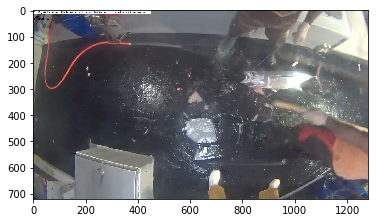

In [22]:
images_paths = glob.glob('../data/train/*/*.jpg')
image = spm.imread(images_paths[1])
print images_paths[1]
plt.imshow(image)
plt.show()

In [26]:
boxes_path = glob.glob('../data/boxes/*.json')
boxes = []
for f_name in boxes_path:
    with open(f_name) as f:
        boxes+=(json.load(f))

pprint.pprint(boxes[1])

{u'annotations': [{u'class': u'rect',
                   u'height': 161.0000000000004,
                   u'width': 300.0000000000007,
                   u'x': 107.00000000000028,
                   u'y': 356.00000000000085}],
 u'class': u'image',
 u'filename': u'../data/train/YFT/img_07901.jpg'}
